<a href="https://colab.research.google.com/github/mazg-95/statistical-learning-2/blob/main/Lab6/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marco Antonio Zuñiga Guzman
21000546

In [49]:
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

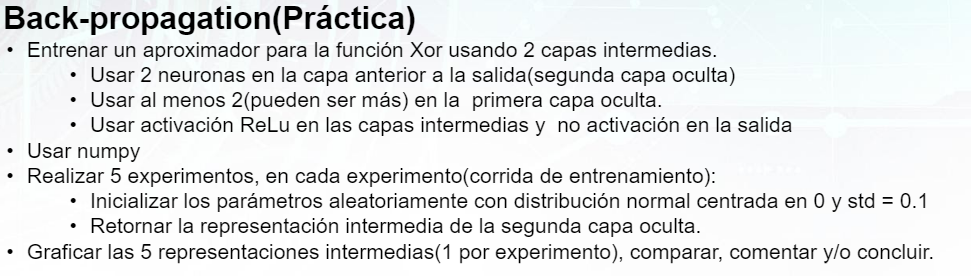

In [64]:


# Encapsulate our neural network in a class
class XORNetwork:
    def __init__(self, x, y, hidden_nodes_1 = 2, epochs = 10, learning_rate = 0.01):
        """Create a XOR with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        self.X = x
        self.y = y

        self.epochs = epochs
        self.lr = learning_rate

        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(hidden_nodes_1, learning_rate)
            
        
    def init_network(self, hidden_nodes_1, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = 2
        self.hidden_nodes_1 = hidden_nodes_1
        self.hidden_nodes_2 = 2
        self.output_nodes = 1

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.random.normal(0.0, np.sqrt(1/self.input_nodes),
                                            (self.input_nodes,hidden_nodes_1))
      
        #First Hidden Layer
        self.weights_1_2 = np.random.normal(0.0, np.sqrt(1/hidden_nodes_1), 
                                        (hidden_nodes_1, self.hidden_nodes_2))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_2_3 = np.random.normal(0.0, np.sqrt(1/self.hidden_nodes_2), 
                                                (self.hidden_nodes_2, self.output_nodes))
        
        
    def identity(self,X):
        return X

    def identity_prime(self,output):
        return 1

    def relu(self, X):
      return np.maximum(0,X) 

    def relu_prime(self, array):
      return (array > 0).astype('int')


    def fwd_prop(self, X):
      def calc_layer(input, weights, activation):
        z = np.matmul(input, weights)
        return z, activation(z)
      
      output_l1, output_l1_a = calc_layer(X, self.weights_0_1, self.relu)
      output_l2, output_l2_a = calc_layer(output_l1_a, self.weights_1_2, self.relu)
      output, output_a = calc_layer(output_l2_a, self.weights_2_3, self.identity)
      return (output_l1, output_l1_a, output_l2, output_l2_a), output, output_a 
    
    def compute_backpropagation(self, X):
      interm_out, output_z, y_hat = self.fwd_prop(X)
      l1, l1_a, l2, l2_a = interm_out
      # dC
      error = y_hat.flatten() - self.y # dL/da2(derivada del costo respecto de la salida y_pred)
      
      # dL = dC * a'(z)
      d3 = error * self.identity_prime(output_z) # error * 1
      
      #w3.T * dL * a'(l2)
      d2 = np.matmul(d3.reshape(-1,1), self.weights_2_3.T) * self.relu_prime(l2)
      
      d1 = np.matmul(d2, self.weights_1_2) * self.relu_prime(l1)
      
      dC_w2_3 = np.matmul(l2_a.T, d3).reshape(-1,1)
      dC_w1_2 = np.matmul(l1_a.T, d2)
      dC_w0_1 = np.matmul(X.T, d1)
      return dC_w0_1, dC_w1_2, dC_w2_3

    def compute_cost(self, y_hat, y):
      return 1/2 * np.mean(np.power(y_hat - y, 2))

    def train(self):
        
        # make sure out we have a matching number of reviews and labels
        assert(self.X.shape[0] == self.y.shape[0])
        
        # Remember when we started for printing time statistics
        start = time.time()
        self.costs = []
        for i in range(self.epochs):
            hidden_out, output_z, y_hat =self.fwd_prop(self.X)
            cost = self.compute_cost(y_hat, self.y)
            self.costs.append(cost)
            gradients_w = self.compute_backpropagation(self.X)
            self.weights_0_1 -= self.lr * gradients_w[0]
            self.weights_1_2 -= self.lr * gradients_w[1]
            self.weights_2_3 -= self.lr * gradients_w[2]
            print(f"EPOCH:  {i}: {cost}")
        self.l_a = hidden_out
        return self

    
    def test(self):
       colours = ListedColormap(['r','b'])
       classes = ["0"," 1"]
       l2_a = self.l_a[3]
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.suptitle('Results')
       ax1.plot(range(1, self.epochs+1), self.costs)
       ax1.set_title("Cost vs Epoch")
       ax2.scatter(l2_a[:,0], l2_a[:,1], c=y.tolist(), cmap=colours)
       ax2.set_title("Intermediate Representations")
       plt.grid(True)
       plt.show()




In [4]:
X = np.array([[0,0,1,1], [0,1,0,1]]).T
y = np.array([0,1,1,0])

EPOCH:  0: 0.19650948844523503
EPOCH:  1: 0.18958090748056894
EPOCH:  2: 0.18781139083257348
EPOCH:  3: 0.18754267369820748
EPOCH:  4: 0.18767298606392366
EPOCH:  5: 0.1833098566082091
EPOCH:  6: 0.1828313633947493
EPOCH:  7: 0.1822920951255691
EPOCH:  8: 0.18173078375448648
EPOCH:  9: 0.18577487781063934
EPOCH:  10: 0.1853879428551173
EPOCH:  11: 0.18486305325623312
EPOCH:  12: 0.18418983893992022
EPOCH:  13: 0.18335806495449286
EPOCH:  14: 0.1823585536398456
EPOCH:  15: 0.18118431400201157
EPOCH:  16: 0.1798317589956932
EPOCH:  17: 0.17851996917061957
EPOCH:  18: 0.18147223098721313
EPOCH:  19: 0.17990918931920913


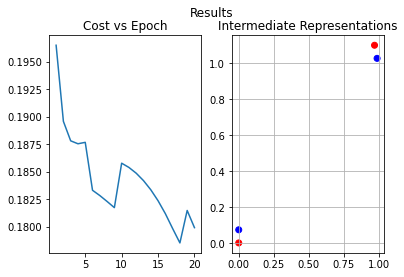

EPOCH:  0: 0.27506278961845787
EPOCH:  1: 0.24514763302604825
EPOCH:  2: 0.22540992018057915
EPOCH:  3: 0.21048694584213457
EPOCH:  4: 0.19892014919188888
EPOCH:  5: 0.19033644064863997
EPOCH:  6: 0.18447114541964293
EPOCH:  7: 0.180840602127153
EPOCH:  8: 0.1787982214432691
EPOCH:  9: 0.17773096558338464
EPOCH:  10: 0.17719069664850906
EPOCH:  11: 0.1769078096598432
EPOCH:  12: 0.17674171131643363
EPOCH:  13: 0.1766261426298935
EPOCH:  14: 0.17653195238322375
EPOCH:  15: 0.176446874110544
EPOCH:  16: 0.17636588248241336
EPOCH:  17: 0.17628800694066504
EPOCH:  18: 0.17621180254717722
EPOCH:  19: 0.1761365186711501


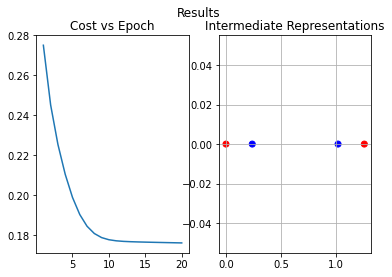

EPOCH:  0: 0.25
EPOCH:  1: 0.25
EPOCH:  2: 0.25
EPOCH:  3: 0.25
EPOCH:  4: 0.25
EPOCH:  5: 0.25
EPOCH:  6: 0.25
EPOCH:  7: 0.25
EPOCH:  8: 0.25
EPOCH:  9: 0.25
EPOCH:  10: 0.25
EPOCH:  11: 0.25
EPOCH:  12: 0.25
EPOCH:  13: 0.25
EPOCH:  14: 0.25
EPOCH:  15: 0.25
EPOCH:  16: 0.25
EPOCH:  17: 0.25
EPOCH:  18: 0.25
EPOCH:  19: 0.25


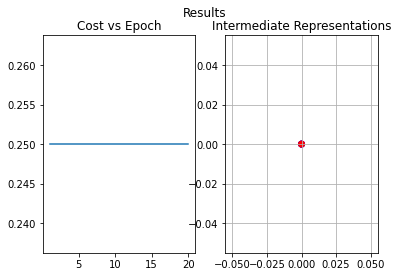

EPOCH:  0: 0.21850815632045972
EPOCH:  1: 0.22229135351343596
EPOCH:  2: 0.2172871452113568
EPOCH:  3: 0.20659196179620004
EPOCH:  4: 0.19589405215875358
EPOCH:  5: 0.18799018924407968
EPOCH:  6: 0.18312037886869595
EPOCH:  7: 0.18047046423519048
EPOCH:  8: 0.17922904224695327
EPOCH:  9: 0.1788411900213186
EPOCH:  10: 0.17897360135439494
EPOCH:  11: 0.17943727285030223
EPOCH:  12: 0.180128962315865
EPOCH:  13: 0.1809949962580615
EPOCH:  14: 0.1820104531520529
EPOCH:  15: 0.1831675610445109
EPOCH:  16: 0.1844693637892989
EPOCH:  17: 0.1859263624263222
EPOCH:  18: 0.18750644137752354
EPOCH:  19: 0.18579913488593724


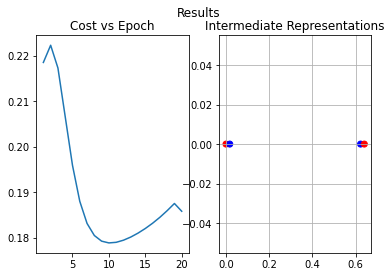

EPOCH:  0: 0.6031970826553381
EPOCH:  1: 0.264546613704718
EPOCH:  2: 0.2153603349213511
EPOCH:  3: 0.19699754750115714
EPOCH:  4: 0.19026183095682364
EPOCH:  5: 0.1881545796898898
EPOCH:  6: 0.18763990939089964
EPOCH:  7: 0.18756838153984837
EPOCH:  8: 0.18758324914346622
EPOCH:  9: 0.18759783258484353
EPOCH:  10: 0.18760017895480757
EPOCH:  11: 0.18759379327392853
EPOCH:  12: 0.18758304752714366
EPOCH:  13: 0.18757078094313406
EPOCH:  14: 0.18755854093265897
EPOCH:  15: 0.18754710070723843
EPOCH:  16: 0.18753682090716584
EPOCH:  17: 0.18752785444117073
EPOCH:  18: 0.1875202531528872
EPOCH:  19: 0.18751402104387394


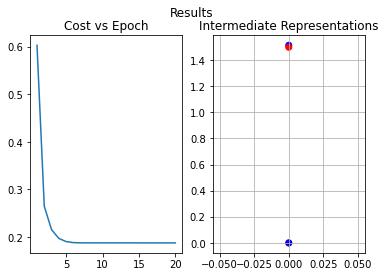

In [67]:
for i in range(5):
    ann = XORNetwork(X, y, epochs=20, learning_rate=0.1)
    ann.train().test()

#### Conclusiones

Se puede observar de los experimentos, que dado la inicializacion de los parametros la red neuronal pueden encontrar representaciones intermedias, mediante transformaciones del espacio, que separen linealmente el espacio.

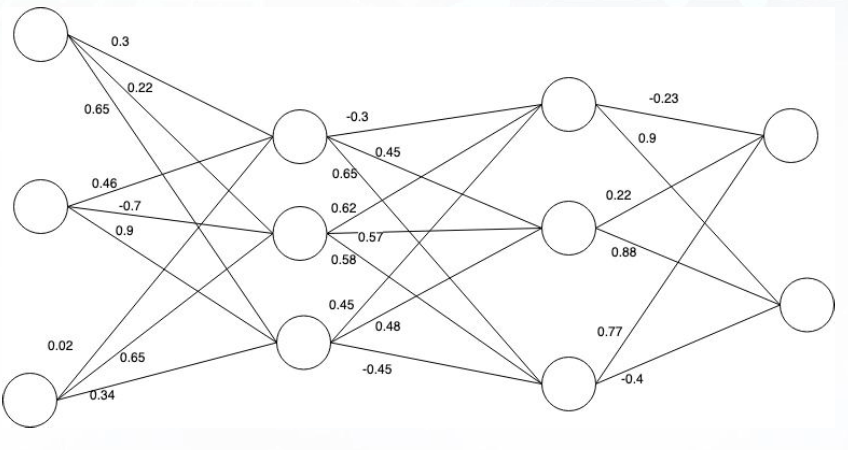

In [70]:
error = np.array([3.0, 10.0])
w1 = np.array([
               [0.3, 0.46, 0.02],
               [0.22, -0.7, 0.65],
               [0.65, 0.9, 0.34]
            ])

w2 = np.array([
               [-0.3, 0.62, 0.45],
               [0.45, 0.57, 0.48],
               [0.65, 0.58, -0.45]
            ])

w3 = np.array([
               [-0.23, 0.22, 0.77],
               [0.9, 0.88, -0.4]
            ])

d3 = np.matmul(error, w3)
d2 = np.matmul(d3, w2)
d1 = np.matmul(d2, w1)

print(f"Error Terms:", d1,d2,d3, sep="\n")


Error Terms:
[8.180294 1.74791  9.303912]
[0.6655 9.5642 9.0408]
[ 8.31  9.46 -1.69]
